# Machine Learning Project: Predict the Greatness of a Movie

This is the ipython notebook for Machine Learning course Fall 2016.
This file is created and modified by Jin Huang, but the project is a group work by Jin Huang, Taihong Cao and Hanzhao Wang.

Purpose:
In this project, we are going to use a dataset on Kaggle, which contains the statistics for over 5000 movies.The dataset is free for downlown or checking on https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset.

We will first do some basic analyze on the dataset, and give our analyzing and understanding. Then, we will use regression models including Linear Regression and Logistic Regression to predict the "IMDB_score" of each movie. Finally, we will compare the performance of different methods and give some conclusion.

# Milestones:
Midway:by 11/29/2016 
    We will finish the analyse of the dataset and the midway report by this date.

There are totally 28 variables in the dataset, and we take the IMDB_score as the label and other 27 as the features.
The discription of the variables are as following:
1."movie_title":This is the title of the movie. 
2."color":This indicates whether this is a color movie. 
3."num_critic_for_reviews":This is the number of the critic for reviews.
4."movie_facebook_likes": The number of "likes" the movie gets on Facebook.
5."duration": The duration of the movie.
6."director_name": The name of the director of the movie.
7."director_facebook_likes": The number of "likes" the director gets on Facebook.
8."actor_3_name": The name of actor3.
9."actor_3_facebook_likes": The number of "likes" the actor3 gets on Facebook. 
10."actor_2_name": The name of actor2
11."actor_2_facebook_likes": The number of "likes" the actor2 gets on Facebook. 
12."actor_1_name": The name of actor1 
13."actor_1_facebook_likes": The number of "likes" the actor1 gets on Facebook. 
14."gross": The gross of the movie.  
15."genres": Tha genres of the movie. 
16."num_voted_users": The number of voted users.
17."cast_total_facebook_likes": 
18."facenumber_in_poster": The face number in the poster of the movie.
19."plot_keywords": The key words for the movie.
20."movie_imdb_link": The IMDB link of the movie.
21."num_user_for_reviews": The number of the user for the reviews of the movie.
22."language": The language of the movie.
23."country": The country in which the movie is made.
24."content_rating": The rating of the content of the movie.
25."budget": The budget of the movie.
26."title_year": The year in which the movie is released.
27."imdb_score": The IMDB score of the movie.
28."aspect_ratio": The aspect ratio of the movie.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv("/Users/Kiyoshi/Downloads/movie_metadata.csv")
df.head() 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [53]:
##Check whether there are missing values in the dataset
from scipy.stats import mode
from sklearn.preprocessing import Imputer

def num_missing(x):
  return sum(x.isnull()) 
print df.apply(num_missing,axis='rows')

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [55]:
##Drop the record rows with NaN values
df2=df.dropna(axis=0)
lines = len(df2) 
print lines
#print df2.apply(num_missing,axis='rows')
df2.head()

3756


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [33]:
##Dealing with catogorical data
df3= df2.drop(['director_name','actor_2_name','actor_1_name','movie_title',
               'actor_3_name','movie_imdb_link','genres','plot_keywords',
               'language', 'country','content_rating','title_year','color'], axis=1)
df3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000


In [34]:
#df_dummy = pd.get_dummies(df3)
#df_dummy.head() 

In [35]:
##Split the dataset into training set and testing set
from sklearn.cross_validation import train_test_split
X,y= df3.iloc[:,1:].values,df3.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

print y_train

[ 323.   19.   20. ...,  119.  167.   25.]


In [36]:
##Standardzing the dataset
#from sklearn.preprocessing import StandardScaler
#stdsc=StandardScaler()
#X_train_std=stdsc.fit_transform(X_train)
#X_test_std=stdsc.fit_transform(X_test)

#print X_train_std
#print X_test_std

In [37]:
## Using random forest to find the most important features
## This paragraph is cited from: https://ljalphabeta.gitbooks.io/python-/content/random_forest_feature_importance.html 
from sklearn.ensemble import RandomForestClassifier

feat_labels=df3.columns[1:]
forest=RandomForestClassifier(n_estimators=500,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
importances=forest.feature_importances_  
indices=np.argsort(importances)[::-1]

In [39]:
for f in range(X_train.shape[1]):
    print("%2d)%-*s%f"%(f+1,30,feat_labels[f],importances[indices[f]]))

 1)duration                      0.088540
 2)director_facebook_likes       0.088031
 3)actor_3_facebook_likes        0.084250
 4)actor_1_facebook_likes        0.079702
 5)gross                         0.079457
 6)num_voted_users               0.079384
 7)cast_total_facebook_likes     0.078153
 8)facenumber_in_poster          0.076340
 9)num_user_for_reviews          0.075528
10)budget                        0.073032
11)actor_2_facebook_likes        0.072899
12)imdb_score                    0.052365
13)aspect_ratio                  0.045413
14)movie_facebook_likes          0.026907


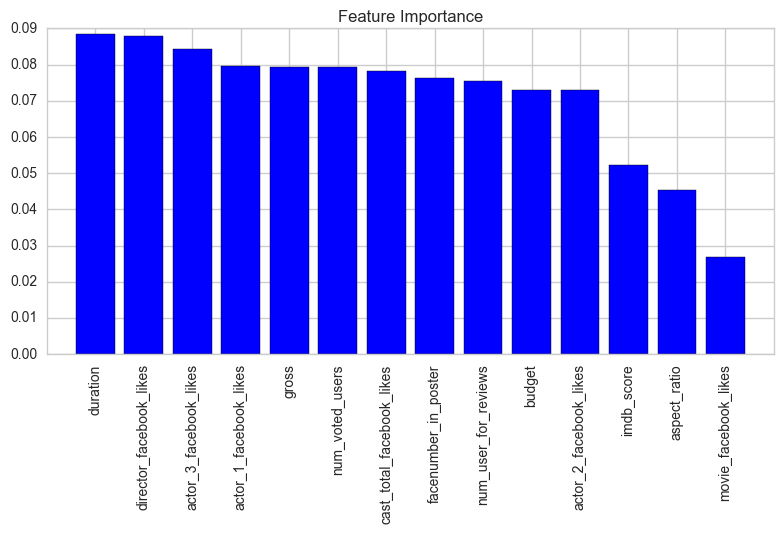

In [41]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],color='blue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

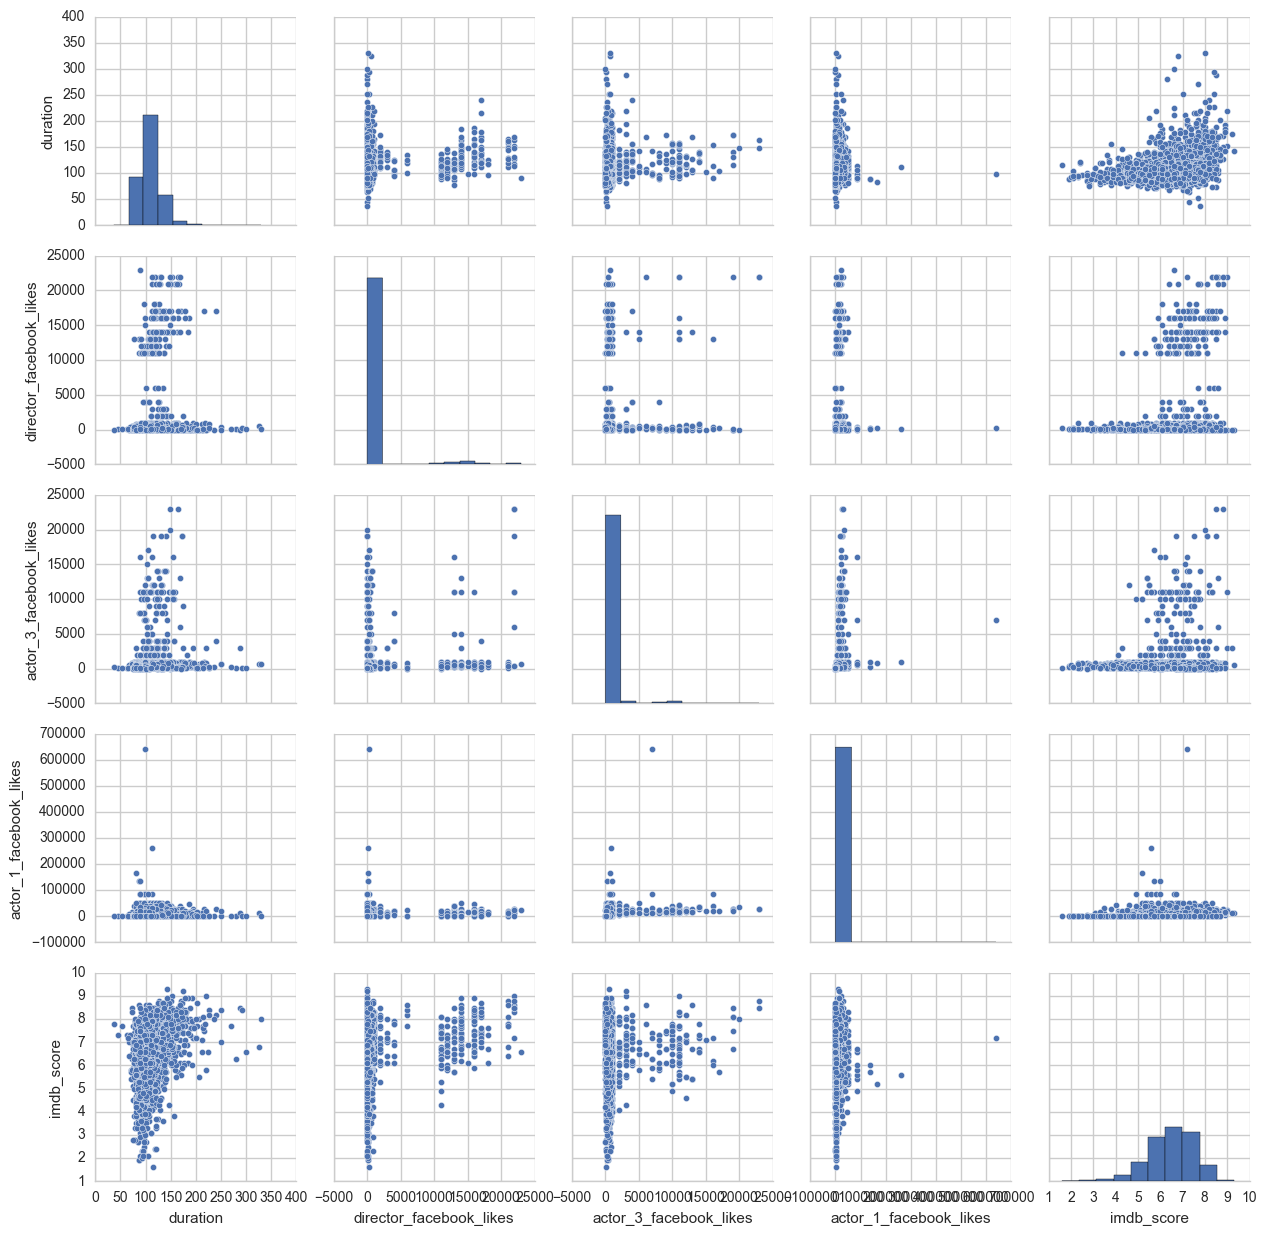

In [47]:
##Apply Scatterplot matrix

sns.set(style='whitegrid', context='notebook')
cols = ['duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','imdb_score']
sns.pairplot(df3[cols], size=2.5);
plt.show()

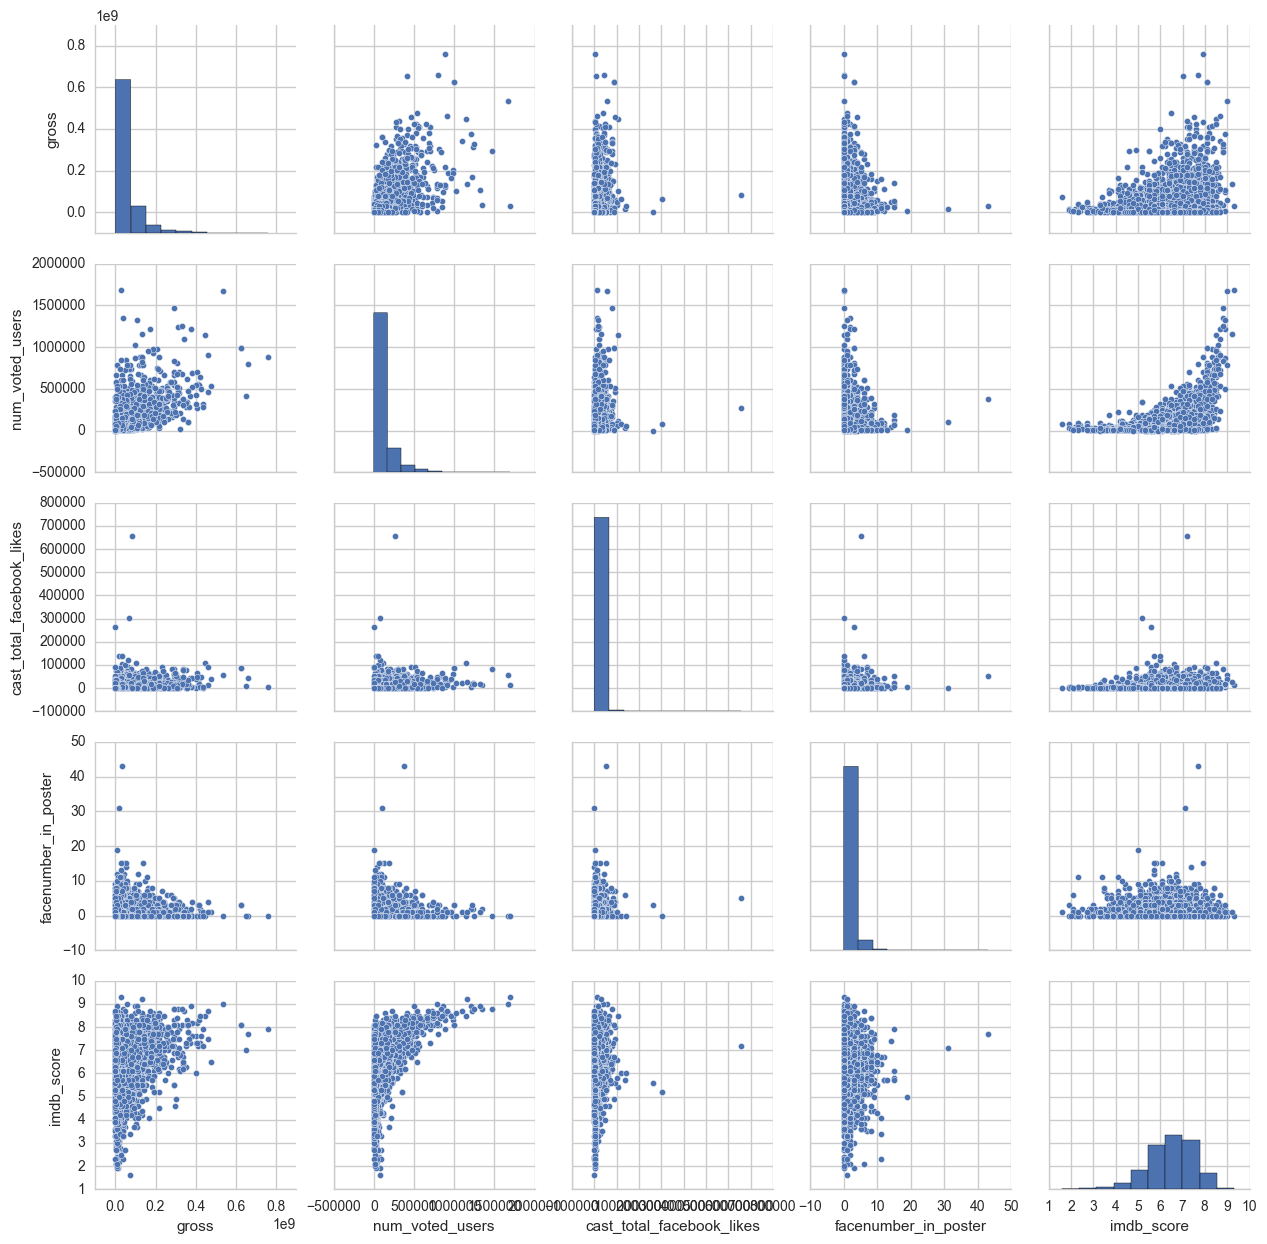

In [49]:
sns.set(style='whitegrid', context='notebook')
cols = ['gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','imdb_score']
sns.pairplot(df3[cols], size=2.5);
plt.show()

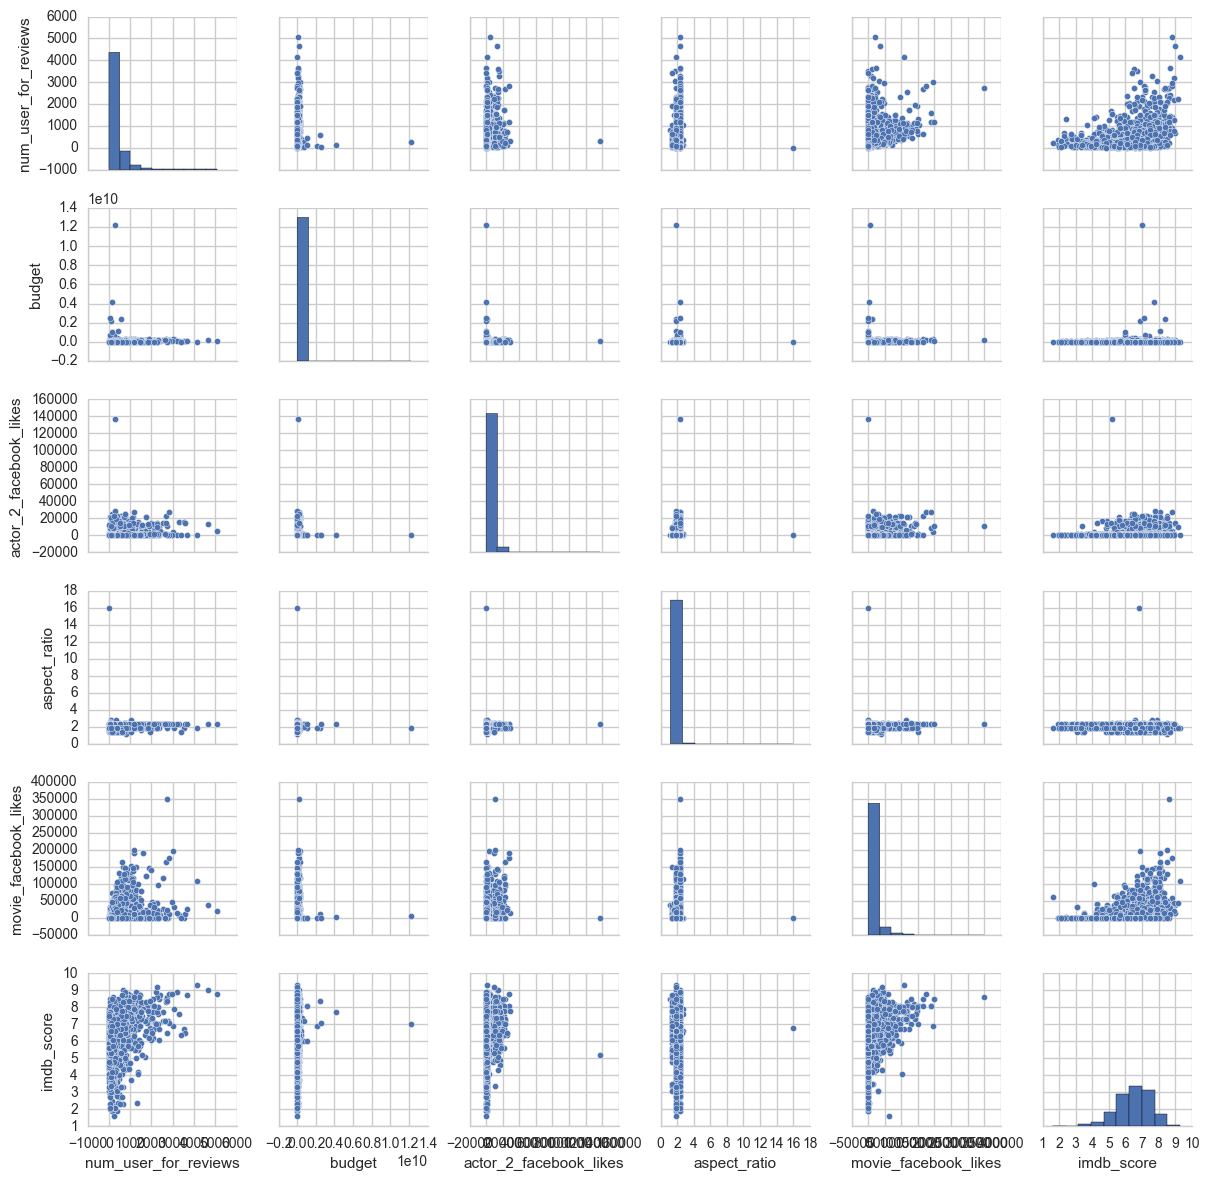

In [50]:
sns.set(style='whitegrid', context='notebook')
cols = ['num_user_for_reviews','budget','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes','imdb_score']
sns.pairplot(df3[cols], size=2);
plt.show()

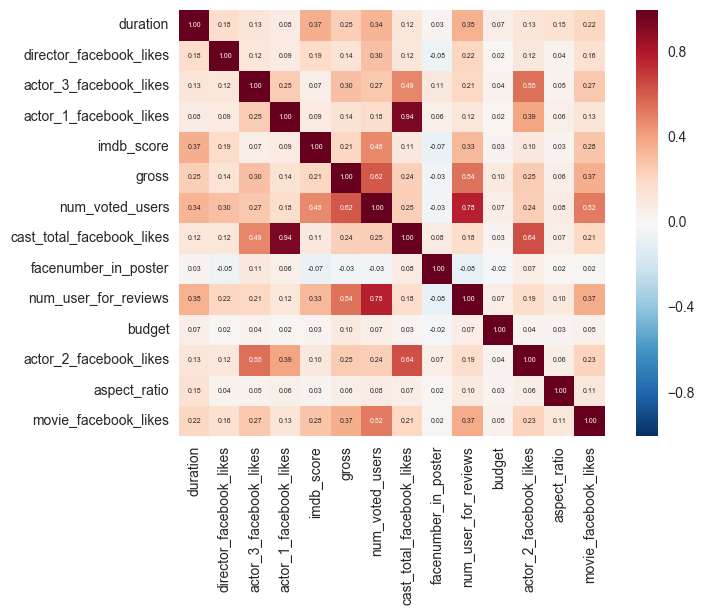

In [65]:
## Caculate correlation matrix
cols=['duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','imdb_score',
                     'gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster',
                     'num_user_for_reviews','budget','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes']
cm = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 5},
            yticklabels=cols,
            xticklabels=cols)
plt.show()